In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Show basic information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# Statistical summary

In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# finding null values

In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# value count of dependent variable

In [7]:
print(df.iloc[:, -1].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


# Correlation heatmap

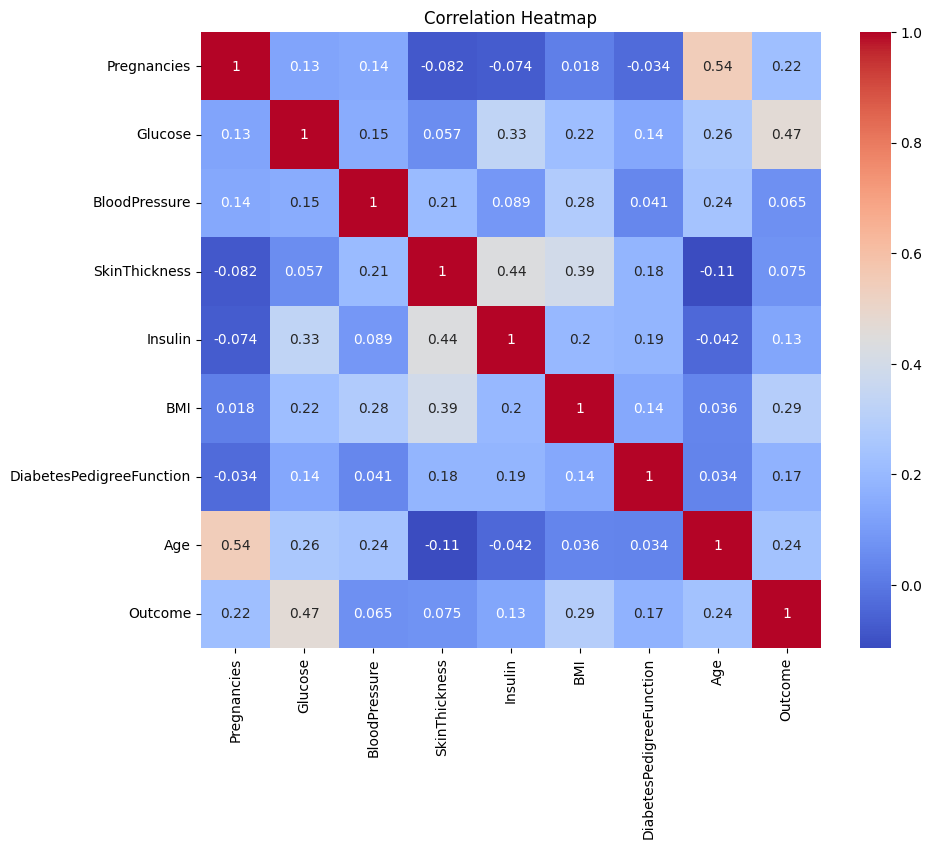

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


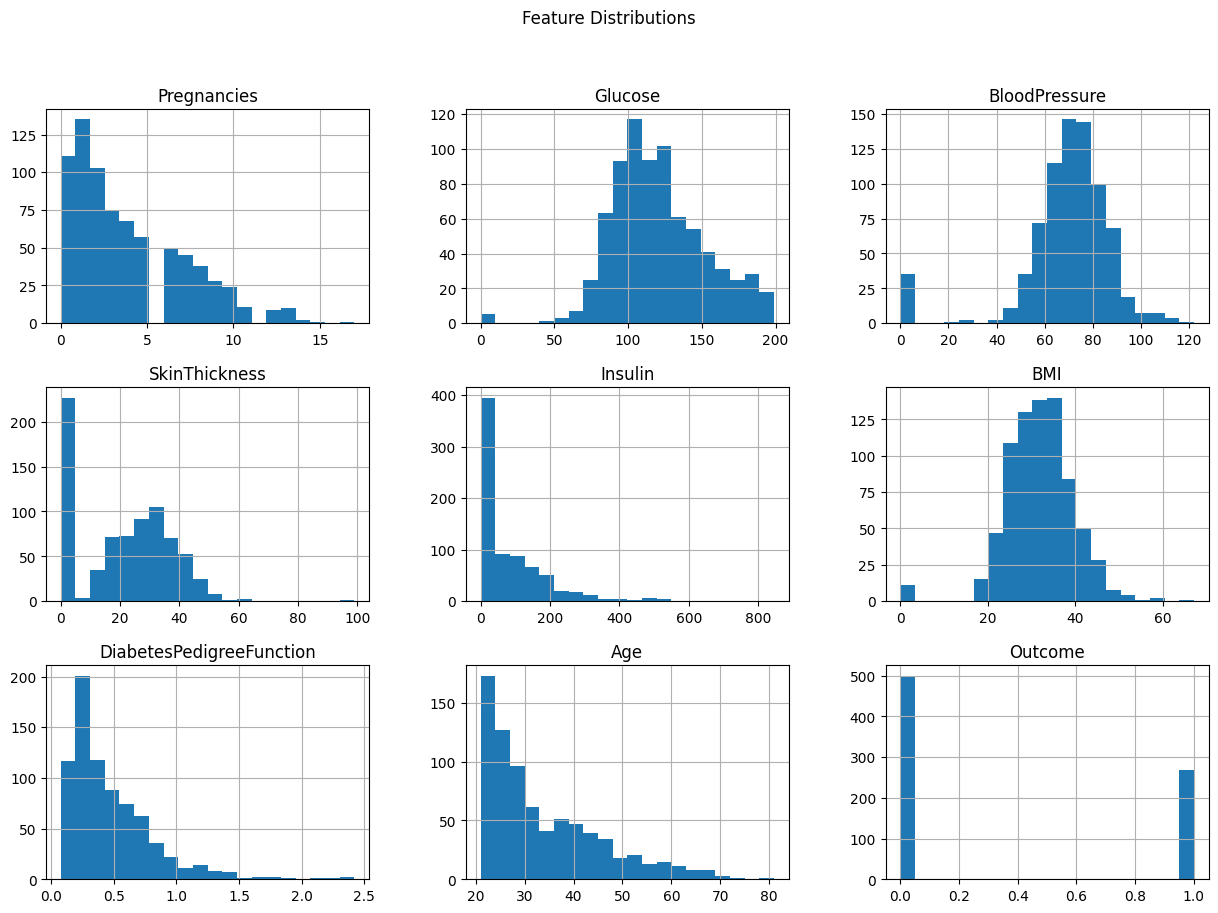

In [9]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

#  Boxplots to detect outliers

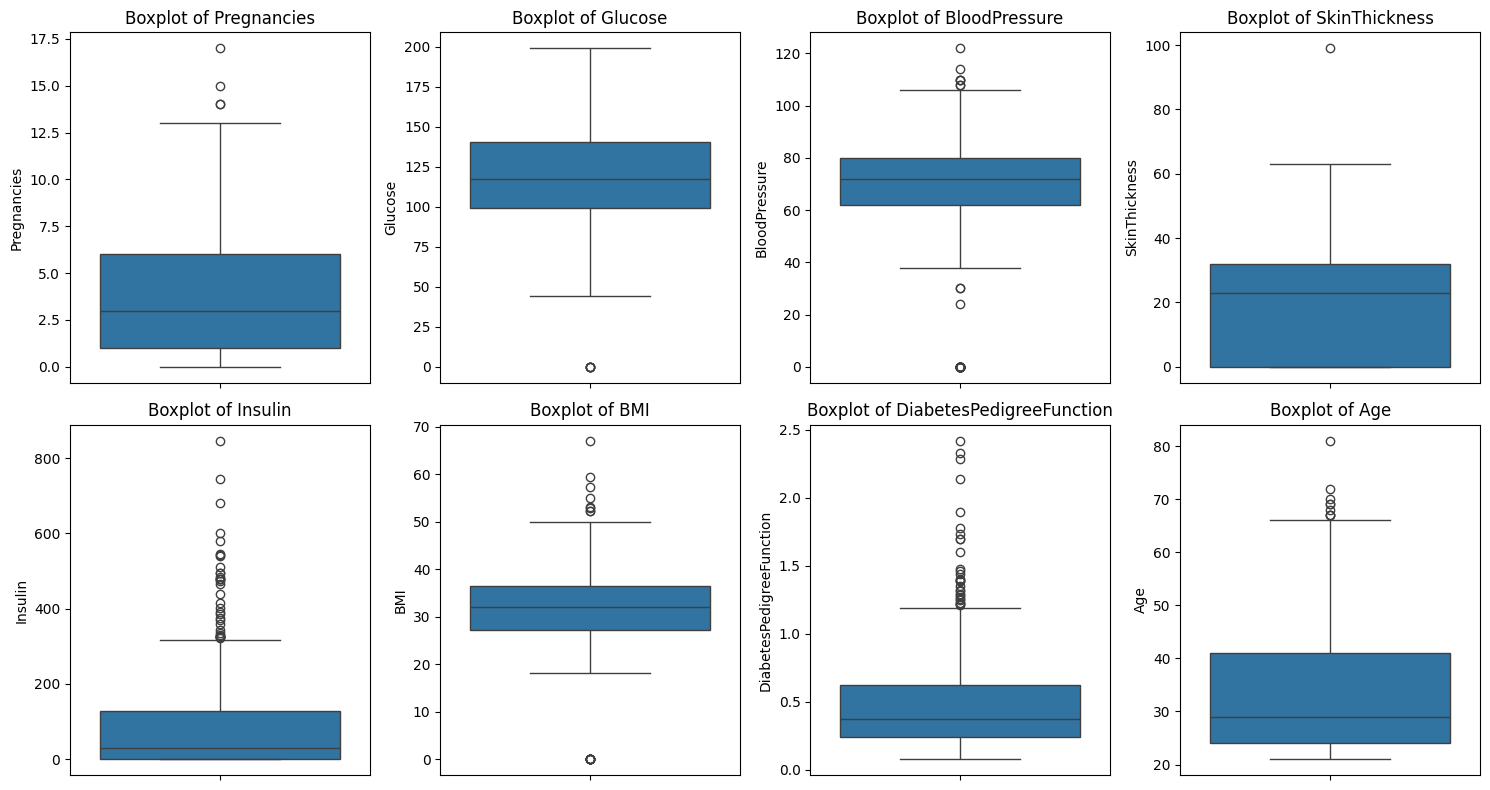

In [10]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# findind the total number of rows

In [11]:
total_rows = df.shape[0]
df.shape[0]

768

In [12]:
# Count how many rows have Insulin = 0
zero_insulin_count = (df['Insulin'] == 0).sum()
percentage_zero = (zero_insulin_count / total_rows) * 100

print(f"Zero Insulin values: {zero_insulin_count}")
print(f"Percentage of 0s in Insulin column: {percentage_zero:.2f}%")

Zero Insulin values: 374
Percentage of 0s in Insulin column: 48.70%


replacing Insulin value zero with mean

In [13]:
#  Calculate mean of Insulin
insulin_mean = df[df['Insulin'] != 0]['Insulin'].mean()

# Replace all 0s in Insulin column with the mean value
df['Insulin'] = df['Insulin'].replace(0, insulin_mean)

# Check if 0s are gone
print((df['Insulin'] == 0).sum())

0


# Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Only the last column

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (614, 8)
Testing set size: (154, 8)


# Feature Scaling (Normalization)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Test data pe fit nahi, sirf transform

# Check scaled values (example: first 5 rows)
print(X_train_scaled[:5])

[[-0.52639686 -1.15139792 -3.75268255 -1.32277365  0.00739544 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519  0.00739544 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957 -0.82739127 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365  0.00739544 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.4750161   1.83812075
  -0.68682934  1.13909516]]


# Model Training (Logistic Regression)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)  # Training

LogisticRegression(random_state=42)

# Model Evaluation
Accuracy

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[80 19]
 [18 37]]


# Hyper parameter tunning

In [18]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(), params, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [19]:
from sklearn.linear_model import LogisticRegression

# Best parameters use
final_model = LogisticRegression(C=1, penalty='l2', random_state=42)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score

# Training Accuracy
y_train_pred = final_model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Test Accuracy
y_test_pred = final_model.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.7654723127035831
Test Accuracy: 0.7597402597402597


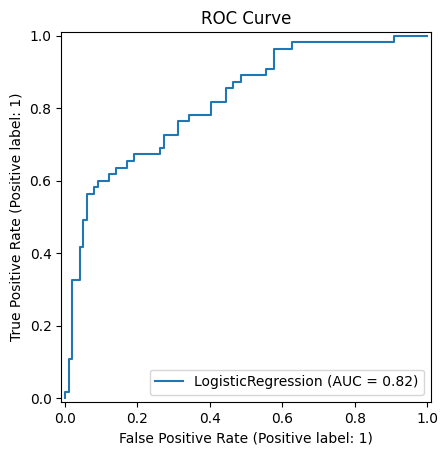

In [21]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(final_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

In [22]:
import joblib

joblib.dump(model, 'best_logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
pip install scikit-learn pandas numpy

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gui Code

In [25]:
!pip install gradio scikit-learn pandas numpy
import gradio as gr
import joblib
import numpy as np

# loding model
model = joblib.load('best_logistic_model.pkl')
scaler = joblib.load('scaler.pkl')

# 2. Prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    inputs = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age]])
    inputs_scaled = scaler.transform(inputs)
    prediction = model.predict(inputs_scaled)[0]
    proba = model.predict_proba(inputs_scaled)[0][1] * 100
    return "Diabetes Risk: HIGH ({:.2f}%)".format(proba) if prediction == 1 else "Diabetes Risk: LOW ({:.2f}%)".format(100-proba)

# 3. Gradio Interface
inputs = [
    gr.Number(label="Pregnancies"),
    gr.Number(label="Glucose (mg/dL)"),
    gr.Number(label="Blood Pressure (mmHg)"),
    gr.Number(label="Skin Thickness (mm)"),
    gr.Number(label="Insulin (μU/mL)"),
    gr.Number(label="BMI"),
    gr.Number(label="Diabetes Pedigree Function"),
    gr.Number(label="Age (years)")
]

gr.Interface(fn=predict_diabetes, inputs=inputs, outputs="text", title="Diabetes Prediction").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1706ab5d6cd5de010c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
